## pagerank

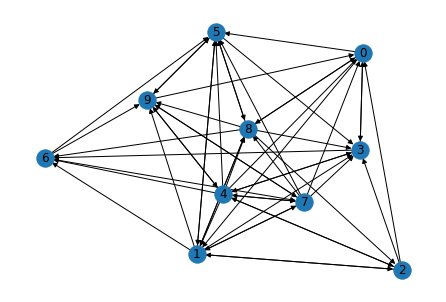

alpha = 0.15
the time cost is :  0.009973526000976562
[0.10330819 0.1021075  0.09096335 0.10429551 0.09953285 0.10555327
 0.09617813 0.09747403 0.09876793 0.10181924]


In [18]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
#generate graph
nodenum=10
G=nx.generators.random_graphs.fast_gnp_random_graph(nodenum, 0.5,directed=True)
nx.draw(G,with_labels=True)
plt.draw()
plt.show()
adj=nx.adjacency_matrix(G, nodelist=None, weight='weight')
adjm=adj.todense()
#generate matrix P and vector V

#generate P
P=[]
listadj=adjm.tolist()
for i in listadj:
    sum=0
    for j in range(len(i)):
        if i[j]==1:
            sum=sum+1
    m=np.array(i)/sum
    P.append(m)

#generate V
V1 = [1/nodenum] * nodenum
#generate I
I1=np.identity(nodenum)
P1=np.array(P).T
a=0.15
b=0.85
print('alpha =',  a)

t1=time.time()
pai=cp.Variable(shape=nodenum,nonneg=True)  #variable
P=cp.Parameter(shape=(nodenum,nodenum),nonneg=True)
I=cp.Parameter(shape=(nodenum,nodenum),nonneg=True)
v=cp.Parameter(shape=nodenum,nonneg=True)
P.value=P1
I.value=I1
v.value=V1
cost=cp.sum_squares((I-a*P)@pai-(b*v))
obj = cp.Minimize(cost)
constraints = [cp.sum(pai) == 1, pai>=0]

prob = cp.Problem(obj, constraints)
prob.solve()
t2=time.time()
print('the time cost is : ', t2-t1)
if(prob.status=='optimal'):
    print(pai.value)
else:
    print(prob.status)


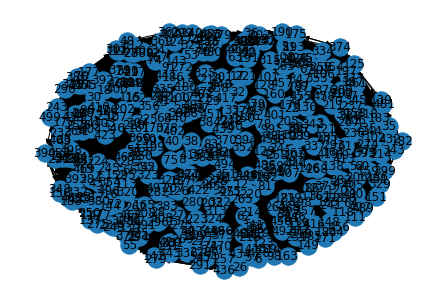

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
alpha = 0.15
the time cost is :  0.2623007297515869
page337 is 0.001968147239639438
page492 is 0.001967655515482264
page87 is 0.0019672362514935563
page457 is 0.001964289596966808
page213 is 0.0019641077030278418
page327 is 0.0020316898232763747
page455 is 0.002031535662904845
page331 is 0.0020312672186037915
page475 is 0.002030520890289127
page413 is 0.002029771079846621
page493 is 0.0020296930393544155
page33 is 0.002029285599969384
page276 is 0.002028933241122289
page428 is 0.0020282869941325647
page135 is 0.0020275049593158874
page54 is 0.0020272704970375685
page237 is 0.0020270795187203295
page258 is 0.0020269211415375465
page20 is 0.0020262572578912895
page390 is 0.0020259860152708913
page31 is 0.0020250347671605753
page435 is 0.0020240028762908914
page481 is 0.002023912757581705
page322 is 0.0020238680958423075
page371 is 0.0

In [57]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
#generate graph
nodenum=500
G=nx.generators.random_graphs.fast_gnp_random_graph(nodenum, 0.5,directed=True)
nx.draw(G,with_labels=True)
plt.draw()
plt.show()
adj=nx.adjacency_matrix(G, nodelist=None, weight='weight')
adjm=adj.todense()
print(adjm)

#generate matrix P and vector V

#generate P
P=[]
listadj=adjm.tolist()
for i in listadj:
    sum=0
    for j in range(len(i)):
        if i[j]==1:
            sum=sum+1
    m=np.array(i)/sum
    P.append(m)
print('P',P)

#generate V
V1 = [1/nodenum] * nodenum
print('V1', V1)
#generate I
I1=np.identity(nodenum)
print('I', I1)

P1=np.array(P).T
a=0.15
b=0.85
print('alpha =',  a)
t1=time.time()

pai=cp.Variable(shape=nodenum,nonneg=True)  #variable
P=cp.Parameter(shape=(nodenum,nodenum),nonneg=True)
I=cp.Parameter(shape=(nodenum,nodenum),nonneg=True)
v=cp.Parameter(shape=nodenum,nonneg=True)
P.value=P1
I.value=I1
v.value=V1

cost=cp.sum_squares((I-a*P)@pai-(b*v))
obj = cp.Minimize(cost)
constraints = [cp.sum(pai) == 1, pai>=0]

prob = cp.Problem(obj, constraints)
prob.solve()
t2=time.time()
print('the time cost is : ', t2-t1)
if(prob.status=='optimal'):
    a=(pai.value).tolist()
    dic={}
    for i in range(len(a)):
        c=str(i+1)
        dic[c]=a[i]
    s=(sorted(dic.items(), key = lambda kv:(kv[1], kv[0]))) 
    for i in range(nodenum):
        print('page{} is {}'.format(s[4-i][0],s[4-i][1]) )
        
else:
    print(prob.status)


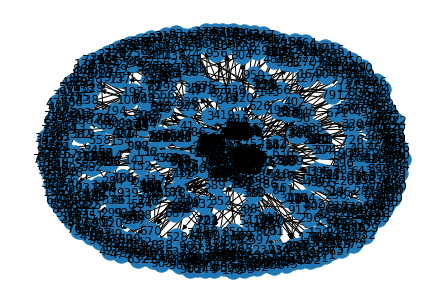

alpha = 0.15
the time cost is :  0.06682014465332031
[0.00249132 0.00482687 0.00128627 0.00127674 0.00228679 0.00140058
 0.00149571 0.00231285 0.00127599 0.00118205 0.00107143 0.00090943
 0.00107143 0.00104586 0.00120783 0.00104586 0.00118165 0.00136596
 0.0011134  0.00114017 0.00107611 0.00090882 0.00090943 0.00130841
 0.00092743 0.00097759 0.00093503 0.00090943 0.0009617  0.00092743
 0.00092743 0.00090943 0.00104586 0.00092743 0.00092743 0.00090943
 0.00092743 0.00090841 0.00090943 0.00090943 0.00090943 0.00090943
 0.00092743 0.00093503 0.00092743 0.00090943 0.00090943 0.00092743
 0.00093503 0.00090943 0.00092743 0.00090943 0.00090943 0.00092743
 0.00092743 0.00092743 0.00090943 0.00090943 0.00090943 0.00090943
 0.00090943 0.00090943 0.00208229 0.00146111 0.00105242 0.00092492
 0.001114   0.00092378 0.00149857 0.00091619 0.00151401 0.00091619
 0.0009094  0.00097667 0.00121765 0.00118226 0.00090881 0.0009094
 0.0009094  0.00091619 0.00099453 0.00104522 0.00091619 0.00090881
 0.0009161

In [20]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
#generate graph
nodenum=1000
G=nx.generators.random_graphs.fast_gnp_random_graph(nodenum, 0.5,directed=True)
nx.draw(G,with_labels=True)
plt.draw()
plt.show()
adj=nx.adjacency_matrix(G, nodelist=None, weight='weight')
adjm=adj.todense()
#generate matrix P and vector V

#generate P
P=[]
listadj=adjm.tolist()
for i in listadj:
    sum=0
    for j in range(len(i)):
        if i[j]==1:
            sum=sum+1
    m=np.array(i)/sum
    P.append(m)

#generate V
V1 = [1/nodenum] * nodenum
#generate I
I1=np.identity(nodenum)
P1=np.array(P).T
a=0.15
b=0.85
print('alpha =',  a)

t1=time.time()
pai=cp.Variable(shape=nodenum,nonneg=True)  #variable
P=cp.Parameter(shape=(nodenum,nodenum),nonneg=True)
I=cp.Parameter(shape=(nodenum,nodenum),nonneg=True)
v=cp.Parameter(shape=nodenum,nonneg=True)
P.value=P1
I.value=I1
v.value=V1
cost=cp.sum_squares((I-a*P)@pai-(b*v))
obj = cp.Minimize(cost)
constraints = [cp.sum(pai) == 1, pai>=0]

prob = cp.Problem(obj, constraints)
prob.solve()
t2=time.time()
print('the time cost is : ', t2-t1)
if(prob.status=='optimal'):
    print(pai.value)
else:
    print(prob.status)


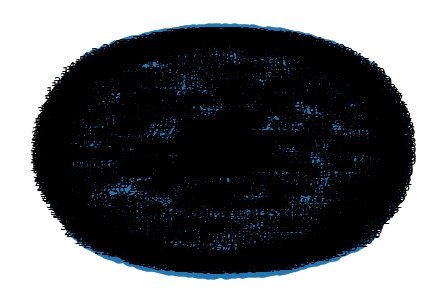

alpha = 0.15
the time cost is :  1.6126911640167236
[0.00197125 0.00021876 0.00035735 ... 0.00019385 0.00020885 0.00018197]


In [19]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
#generate graph
nodenum=5000
G=nx.generators.random_graphs.fast_gnp_random_graph(nodenum, 0.5,directed=True)
nx.draw(G,with_labels=True)
plt.draw()
plt.show()
adj=nx.adjacency_matrix(G, nodelist=None, weight='weight')
adjm=adj.todense()
#generate matrix P and vector V

#generate P
P=[]
listadj=adjm.tolist()
for i in listadj:
    sum=0
    for j in range(len(i)):
        if i[j]==1:
            sum=sum+1
    m=np.array(i)/sum
    P.append(m)

#generate V
V1 = [1/nodenum] * nodenum
#generate I
I1=np.identity(nodenum)
P1=np.array(P).T
a=0.15
b=0.85
print('alpha =',  a)

t1=time.time()
pai=cp.Variable(shape=nodenum,nonneg=True)  #variable
P=cp.Parameter(shape=(nodenum,nodenum),nonneg=True)
I=cp.Parameter(shape=(nodenum,nodenum),nonneg=True)
v=cp.Parameter(shape=nodenum,nonneg=True)
P.value=P1
I.value=I1
v.value=V1
cost=cp.sum_squares((I-a*P)@pai-(b*v))
obj = cp.Minimize(cost)
constraints = [cp.sum(pai) == 1, pai>=0]

prob = cp.Problem(obj, constraints)
prob.solve()
t2=time.time()
print('the time cost is : ', t2-t1)
if(prob.status=='optimal'):
    print(pai.value)
else:
    print(prob.status)


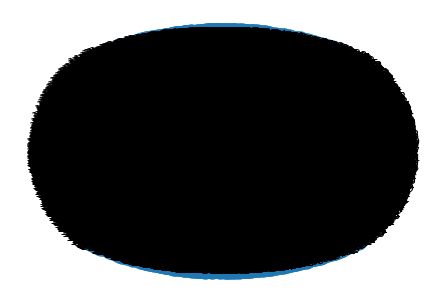

alpha = 0.15


C:\Users\czhang455\AppData\Local\Programs\Python\Python37\lib\site-packages\cvxpy\problems\problem.py:851: RuntimeWarning: overflow encountered in long_scalars
  self.num_scalar_data += const.size


the time cost is :  31.49232268333435
[6.89780515e-04 7.20920269e-05 2.42885237e-04 ... 4.85256136e-05
 4.55722825e-05 5.24510652e-05]


In [4]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
#generate graph
nodenum=20000
G=nx.generators.random_graphs.fast_gnp_random_graph(nodenum, 0.5,directed=True)
nx.draw(G,with_labels=True)
plt.draw()
plt.show()
adj=nx.adjacency_matrix(G, nodelist=None, weight='weight')
adjm=adj.todense()
#generate matrix P and vector V

#generate P
P=[]
listadj=adjm.tolist()
for i in listadj:
    sum=0
    for j in range(len(i)):
        if i[j]==1:
            sum=sum+1
    m=np.array(i)/sum
    P.append(m)

#generate V
V1 = [1/nodenum] * nodenum
#generate I
I1=np.identity(nodenum)
P1=np.array(P).T
a=0.15
b=0.85
print('alpha =',  a)

t1=time.time()
pai=cp.Variable(shape=nodenum,nonneg=True)  #variable
P=cp.Parameter(shape=(nodenum,nodenum),nonneg=True)
I=cp.Parameter(shape=(nodenum,nodenum),nonneg=True)
v=cp.Parameter(shape=nodenum,nonneg=True)
P.value=P1
I.value=I1
v.value=V1
cost=cp.sum_squares((I-a*P)@pai-(b*v))
obj = cp.Minimize(cost)
constraints = [cp.sum(pai) == 1, pai>=0]

prob = cp.Problem(obj, constraints)
prob.solve()
t2=time.time()
print('the time cost is : ', t2-t1)
if(prob.status=='optimal'):
    print(pai.value)
else:
    print(prob.status)


## world cup 2018 rank

In [17]:
import numpy as np
import cvxpy as cp
Team=['ARGENTINA','AUSTRALIA','BELGIUM','BRAZIL', 'COLOMBIA','COSTA RICA','CROATIA', 'DENMARK', 'EGYPT','ENGLAND', 'FRANCE',  'GERMANY', 
      'ICELAND', 'IR IRAN','JAPAN', 'KOREA REPUBLIC', 'MEXICO', 'MOROCCO','NIGERIA', 'PANAMA', 'PERU', 'POLAND', 'PORTUGAL','RUSSIA',
      'SAUDI ARABIA','SENEGAL', 'SERBIA', 'SPAIN','SWEDEN','SWITZERLAND', 'TUNISIA', 'URUGUAY' ]
TeamList = {t:i for i,t in enumerate(Team)}
m = 64
n = 32
B = np.zeros((m,n))
V = np.zeros(m)
game_records=[
['RUSSIA', 'SAUDI ARABIA',5],
['EGYPT', 'URUGUAY', -1],
['MOROCCO', 'IR IRAN', -1 ],
['PORTUGAL', 'SPAIN', 0],
['FRANCE', 'AUSTRALIA', 1],
['ARGENTINA', 'ICELAND',0],
['PERU', 'DENMARK',-1],
['CROATIA', 'NIGERIA',2],
['COSTA RICA', 'SERBIA', -1],
['GERMANY', 'MEXICO',-1],
['BRAZIL', 'SWITZERLAND',0],
['SWEDEN', 'KOREA REPUBLIC',1],
['BELGIUM', 'PANAMA',3],
['TUNISIA', 'ENGLAND', -1],
['COLOMBIA', 'JAPAN', -1],
['POLAND', 'SENEGAL',-1],
['RUSSIA', 'EGYPT', 2],
['PORTUGAL', 'MOROCCO', 1],
['URUGUAY', 'SAUDI ARABIA', 1],
['IR IRAN', 'SPAIN', -1],
['DENMARK', 'AUSTRALIA',0],
['FRANCE', 'PERU', 1],
['ARGENTINA', 'CROATIA', -3],
['BRAZIL', 'COSTA RICA', 2],
['NIGERIA', 'ICELAND', 2],
['SERBIA', 'SWITZERLAND', -1],
['BELGIUM', 'TUNISIA', 3],
['KOREA REPUBLIC', 'MEXICO', -1],
['GERMANY', 'SWEDEN', 1],
['ENGLAND', 'PANAMA', 5],
['JAPAN', 'SENEGAL', 0],
['POLAND', 'COLOMBIA', -3],
['URUGUAY', 'RUSSIA', 3],
['SAUDI ARABIA', 'EGYPT', 1],
['SPAIN', 'MOROCCO', 0],
['IR IRAN', 'PORTUGAL', 0],
['AUSTRALIA', 'PERU',-2],
['DENMARK', 'FRANCE', 0],
['NIGERIA', 'ARGENTINA',-1],
['ICELAND', 'CROATIA', -1],
['KOREA REPUBLIC', 'GERMANY', 2],
['MEXICO', 'SWEDEN', -3],
['SERBIA', 'BRAZIL', 2],
['SWITZERLAND', 'COSTA RICA', 0],
['JAPAN', 'POLAND', -1],
['SENEGAL', 'COLOMBIA',-1],
['PANAMA', 'TUNISIA', -1],
['ENGLAND', 'BELGIUM', -1],
['FRANCE', 'ARGENTINA',1],
['URUGUAY', 'PORTUGAL',1],
['SPAIN', 'RUSSIA', 0],
['CROATIA', 'DENMARK', 0],
['BRAZIL', 'MEXICO', 2],
['BELGIUM', 'JAPAN', 1],
['SWEDEN', 'SWITZERLAND', 1],
['COLOMBIA', 'ENGLAND',0],
['URUGUAY', 'FRANCE', -2],
['BRAZIL', 'BELGIUM',-1],
['SWEDEN', 'ENGLAND', -2],
['RUSSIA', 'CROATIA', 0],
['FRANCE', 'BELGIUM',1],
['CROATIA', 'ENGLAND', 1],
['BELGIUM', 'ENGLAND', 2],
['FRANCE', 'CROATIA', 2]]
# print("teamlist['RUSSIA']",teamlist['RUSSIA'])

for k in range(m):
    record = game_records[k]
    i = TeamList[record[0]]
    j = TeamList[record[1]]
    point = record[2]
    B[k][i] = 1
    B[k][j] = -1
    V[k] = point

r=cp.Variable(n)
obj=cp.Minimize(cp.norm(B@r-V))
constraints=[cp.sum(r)==0]
prob=cp.Problem(obj,constraints)
prob.solve()
print('r=', r.value)
print('The best team is :',Team[np.argmax(r.value)])
rank={i+1:t for i,t in enumerate(r.value)}
LowtoLarge=sorted(rank.items(), key = lambda kv:(kv[1], kv[0]))
print('Team rank')
for i in range(31,-1,-1):
    print(Team[LowtoLarge[i][0]-1])

r= [ 0.20789456  1.10504418  1.3878587  -0.28815973  0.84742826 -1.31016204
  1.58201703  2.00043875 -1.10416668  0.65380797  2.45964962 -2.02317125
 -0.35504421  0.27083332  0.19423841 -1.52317125 -1.87616895 -0.22916668
  0.14495579 -2.72916666  1.85504418 -0.60416666  0.43251664  0.96241672
 -1.35416668  0.14583334 -0.06016204  0.60915    -0.67017357 -0.58216434
 -1.22916666  1.07924992]
The best team is : FRANCE
Team rank
FRANCE
DENMARK
PERU
CROATIA
BELGIUM
AUSTRALIA
URUGUAY
RUSSIA
COLOMBIA
ENGLAND
SPAIN
PORTUGAL
IR IRAN
ARGENTINA
JAPAN
SENEGAL
NIGERIA
SERBIA
MOROCCO
BRAZIL
ICELAND
SWITZERLAND
POLAND
SWEDEN
EGYPT
TUNISIA
COSTA RICA
SAUDI ARABIA
KOREA REPUBLIC
MEXICO
GERMANY
PANAMA


## Virus Propogation

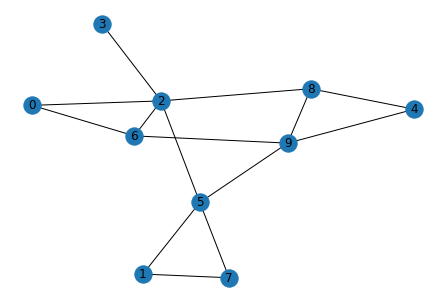

the time cost is :  0.010970830917358398


In [72]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
#generate graph
nodenum=10
G=nx.generators.random_graphs.fast_gnp_random_graph(nodenum, 0.4,directed=False)
nx.draw(G,with_labels=True)
plt.draw()
plt.show()
adj=nx.adjacency_matrix(G)
adjm=adj.todense()
#generate matrix M
M=np.zeros([nodenum,nodenum])
for i in range(nodenum):
    for j in range(nodenum):
        if adjm[i,j]>0:
            ci=np.random.randint(2,10)
            adjm[i,j]=adjm[i,j]*ci
            
            
for i in range(nodenum):
    totalink=np.sum(adjm[i])
    for j in range(nodenum):
        if adjm[i,j]>0:
            ci=np.random.randint(1,10)
            adjm[i,j]=adjm[i,j]*ci
            M[i,j]=adjm[i,j]/totalink

t1=time.time()
x=cp.Variable(shape=nodenum,nonneg=True)
I=np.identity(nodenum)
cost=cp.sum_squares((I-M)@x)
obj = cp.Minimize(cost)
constraints = [cp.sum(x)==1, x>=0]
prob = cp.Problem(obj, constraints)
prob.solve()
t2=time.time()
if(prob.status=='optimal'):
    print('the time cost is : ', t2-t1)
else:
    print(prob.status)


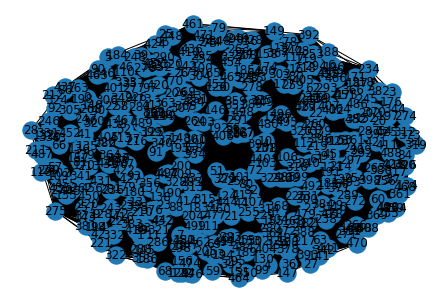

the time cost is :  0.1405925750732422


In [73]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
#generate graph
nodenum=500
G=nx.generators.random_graphs.fast_gnp_random_graph(nodenum, 0.4,directed=False)
nx.draw(G,with_labels=True)
plt.draw()
plt.show()
adj=nx.adjacency_matrix(G)
adjm=adj.todense()
#generate matrix M
M=np.zeros([nodenum,nodenum])
for i in range(nodenum):
    for j in range(nodenum):
        if adjm[i,j]>0:
            ci=np.random.randint(2,10)
            adjm[i,j]=adjm[i,j]*ci
            
            
for i in range(nodenum):
    totalink=np.sum(adjm[i])
    for j in range(nodenum):
        if adjm[i,j]>0:
            ci=np.random.randint(1,10)
            adjm[i,j]=adjm[i,j]*ci
            M[i,j]=adjm[i,j]/totalink

t1=time.time()
x=cp.Variable(shape=nodenum,nonneg=True)
I=np.identity(nodenum)
cost=cp.sum_squares((I-M)@x)
obj = cp.Minimize(cost)
constraints = [cp.sum(x)==1, x>=0]
prob = cp.Problem(obj, constraints)
prob.solve()
t2=time.time()
if(prob.status=='optimal'):
    print('the time cost is : ', t2-t1)
else:
    print(prob.status)


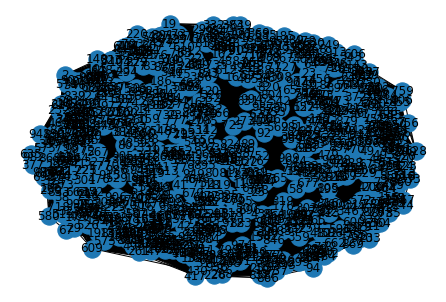

the time cost is :  1.532353162765503


In [77]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
#generate graph
nodenum=1000
G=nx.generators.random_graphs.fast_gnp_random_graph(nodenum, 0.4,directed=False)
nx.draw(G,with_labels=True)
plt.draw()
plt.show()
adj=nx.adjacency_matrix(G)
adjm=adj.todense()
#generate matrix M
M=np.zeros([nodenum,nodenum])
for i in range(nodenum):
    for j in range(nodenum):
        if adjm[i,j]>0:
            ci=np.random.randint(2,10)
            adjm[i,j]=adjm[i,j]*ci
            
            
for i in range(nodenum):
    totalink=np.sum(adjm[i])
    for j in range(nodenum):
        if adjm[i,j]>0:
            ci=np.random.randint(1,10)
            adjm[i,j]=adjm[i,j]*ci
            M[i,j]=adjm[i,j]/totalink

t1=time.time()
x=cp.Variable(shape=nodenum,nonneg=True)
I=np.identity(nodenum)
cost=cp.sum_squares((I-M)@x)
obj = cp.Minimize(cost)
constraints = [cp.sum(x)==1, x>=0]
prob = cp.Problem(obj, constraints)
prob.solve()
t2=time.time()
if(prob.status=='optimal'):
    print('the time cost is : ', t2-t1)
else:
    print(prob.status)


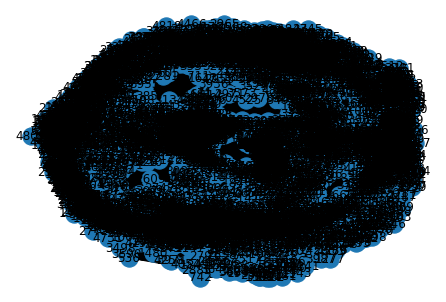

the time cost is :  61.7359619140625


In [75]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
#generate graph
nodenum=5000
G=nx.generators.random_graphs.fast_gnp_random_graph(nodenum, 0.4,directed=False)
nx.draw(G,with_labels=True)
plt.draw()
plt.show()
adj=nx.adjacency_matrix(G)
adjm=adj.todense()
#generate matrix M
M=np.zeros([nodenum,nodenum])
for i in range(nodenum):
    for j in range(nodenum):
        if adjm[i,j]>0:
            ci=np.random.randint(2,10)
            adjm[i,j]=adjm[i,j]*ci
            
            
for i in range(nodenum):
    totalink=np.sum(adjm[i])
    for j in range(nodenum):
        if adjm[i,j]>0:
            ci=np.random.randint(1,10)
            adjm[i,j]=adjm[i,j]*ci
            M[i,j]=adjm[i,j]/totalink

t1=time.time()
x=cp.Variable(shape=nodenum,nonneg=True)
I=np.identity(nodenum)
cost=cp.sum_squares((I-M)@x)
obj = cp.Minimize(cost)
constraints = [cp.sum(x)==1, x>=0]
prob = cp.Problem(obj, constraints)
prob.solve()
t2=time.time()
if(prob.status=='optimal'):
    print('the time cost is : ', t2-t1)
else:
    print(prob.status)


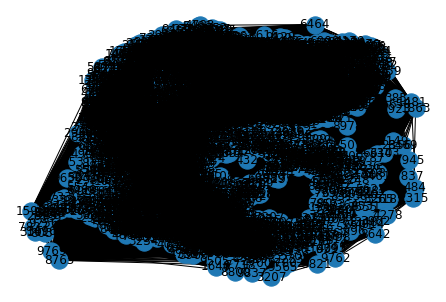

the time cost is :  396.6935260295868


In [76]:
import cvxpy as cp
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time
#generate graph
nodenum=10000
G=nx.generators.random_graphs.fast_gnp_random_graph(nodenum, 0.4,directed=False)
nx.draw(G,with_labels=True)
plt.draw()
plt.show()
adj=nx.adjacency_matrix(G)
adjm=adj.todense()
#generate matrix M
M=np.zeros([nodenum,nodenum])
for i in range(nodenum):
    for j in range(nodenum):
        if adjm[i,j]>0:
            ci=np.random.randint(2,10)
            adjm[i,j]=adjm[i,j]*ci
            
            
for i in range(nodenum):
    totalink=np.sum(adjm[i])
    for j in range(nodenum):
        if adjm[i,j]>0:
            ci=np.random.randint(1,10)
            adjm[i,j]=adjm[i,j]*ci
            M[i,j]=adjm[i,j]/totalink

t1=time.time()
x=cp.Variable(shape=nodenum,nonneg=True)
I=np.identity(nodenum)
cost=cp.sum_squares((I-M)@x)
obj = cp.Minimize(cost)
constraints = [cp.sum(x)==1, x>=0]
prob = cp.Problem(obj, constraints)
prob.solve()
t2=time.time()
if(prob.status=='optimal'):
    print('the time cost is : ', t2-t1)
else:
    print(prob.status)
